<a href="https://colab.research.google.com/github/korlapu/FML-LAB/blob/main/Logistic_Regression_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

loading libraries

In [2]:
titanic = pd.read_csv('/content/Titanic.csv')

In [3]:
titanic.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')

In [4]:
titanic.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [5]:
titanic.describe

<bound method NDFrame.describe of         sex   age  sibsp  parch     fare embarked   class    who  alone  \
0      male  22.0      1      0   7.2500        S   Third    man  False   
1    female  38.0      1      0  71.2833        C   First  woman  False   
2    female  26.0      0      0   7.9250        S   Third  woman   True   
3    female  35.0      1      0  53.1000        S   First  woman  False   
4      male  35.0      0      0   8.0500        S   Third    man   True   
..      ...   ...    ...    ...      ...      ...     ...    ...    ...   
886    male  27.0      0      0  13.0000        S  Second    man   True   
887  female  19.0      0      0  30.0000        S   First  woman   True   
888  female   NaN      1      2  23.4500        S   Third  woman  False   
889    male  26.0      0      0  30.0000        C   First    man   True   
890    male  32.0      0      0   7.7500        Q   Third    man   True   

     survived  
0           0  
1           1  
2           1  
3

In [6]:
titanic.shape

(891, 10)

In [7]:
titanic.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [14]:
titanic['age']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    21.75
889    26.00
890    32.00
Name: age, Length: 891, dtype: float64

In [9]:
titanic['age']=titanic['age'].fillna(titanic.groupby(['class', 'sex'])['age'].transform('mean'))

In [15]:
X=titanic.iloc[:,:9]
y=titanic.iloc[:,8]

In [19]:
titanic=titanic.dropna()

In [20]:
titanic.shape

(889, 10)

In [21]:
X.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone'],
      dtype='object')

In [17]:
X['sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
le = LabelEncoder()

In [22]:
X['sex']= le.fit_transform(X['sex'])

In [23]:
X['embarked']=le.fit_transform(X['embarked'])

In [24]:
X['class']=le.fit_transform(X['class'])

In [25]:
X['who']=le.fit_transform(X['who'])

In [26]:
X['alone']=le.fit_transform(X['alone'])

In [27]:
X.shape, y.shape

((891, 9), (891,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=46)

In [29]:
X_train

,sex,age,sibsp,parch,fare,embarked,class,who,alone
605,1,36.000000,1,0,15.5500,2,2,1,0
851,1,74.000000,0,0,7.7750,2,2,1,1
256,0,34.611765,0,0,79.2000,0,0,2,1
398,1,23.000000,0,0,10.5000,2,1,1,1
746,1,16.000000,1,1,20.2500,2,2,1,0
...,...,...,...,...,...,...,...,...,...
442,1,25.000000,1,0,7.7750,2,2,1,0
372,1,19.000000,0,0,8.0500,2,2,1,1
552,1,26.507589,0,0,7.8292,1,2,1,1
837,1,26.507589,0,0,8.0500,2,2,1,1


In [30]:
y_train.shape

(623,)

In [31]:
X_train , X_test

(     sex        age  sibsp  parch     fare  embarked  class  who  alone
 605    1  36.000000      1      0  15.5500         2      2    1      0
 851    1  74.000000      0      0   7.7750         2      2    1      1
 256    0  34.611765      0      0  79.2000         0      0    2      1
 398    1  23.000000      0      0  10.5000         2      1    1      1
 746    1  16.000000      1      1  20.2500         2      2    1      0
 ..   ...        ...    ...    ...      ...       ...    ...  ...    ...
 442    1  25.000000      1      0   7.7750         2      2    1      0
 372    1  19.000000      0      0   8.0500         2      2    1      1
 552    1  26.507589      0      0   7.8292         1      2    1      1
 837    1  26.507589      0      0   8.0500         2      2    1      1
 189    1  36.000000      0      0   7.8958         2      2    1      1
 
 [623 rows x 9 columns],
      sex        age  sibsp  parch      fare  embarked  class  who  alone
 624    1  21.000000   

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
     

In [33]:
model = LogisticRegression(C=0.3)
model.fit(X_train,y_train)
     

LogisticRegression(C=0.3)

In [34]:
y_train_pred=model.predict(X_train)

In [35]:
X_test = scaler.fit_transform(X_test)

In [36]:
y_test_pred=model.predict(X_test)

In [37]:
model.score(X_train,y_train)

1.0

In [38]:
model.score(X_test,y_test_pred)

1.0

In [39]:
cm=confusion_matrix(y_test, y_test_pred)

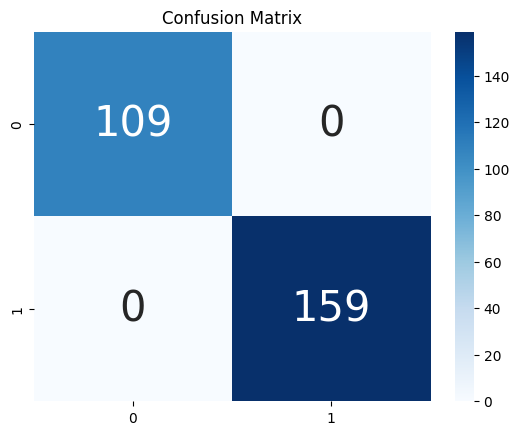

In [40]:
import seaborn as sns
ax= plt.axes()
df_cm=cm
sns.heatmap(df_cm,annot=True,annot_kws={"size":30},fmt='d',cmap="Blues",ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

In [42]:
#more comprehensive report on the classification
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00       109
        True       1.00      1.00      1.00       159

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

